In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *
import importlib

In [2]:
df = load_data()

# Evaluate the best number of Cluster on product

In [3]:
matrix = tf_idf(df)

In [4]:
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.06539
Clusters = 3 ,Silhouette Score = 0.0973
Clusters = 4 ,Silhouette Score = 0.12028
Clusters = 5 ,Silhouette Score = 0.13913
Clusters = 6 ,Silhouette Score = 0.14752
Clusters = 7 ,Silhouette Score = 0.11348
Clusters = 8 ,Silhouette Score = 0.08078
Clusters = 9 ,Silhouette Score = 0.07797
Clusters = 10 ,Silhouette Score = 0.08938
Clusters = 11 ,Silhouette Score = 0.06361
Clusters = 12 ,Silhouette Score = 0.04589
Clusters = 13 ,Silhouette Score = 0.03957
Clusters = 14 ,Silhouette Score = 0.0869


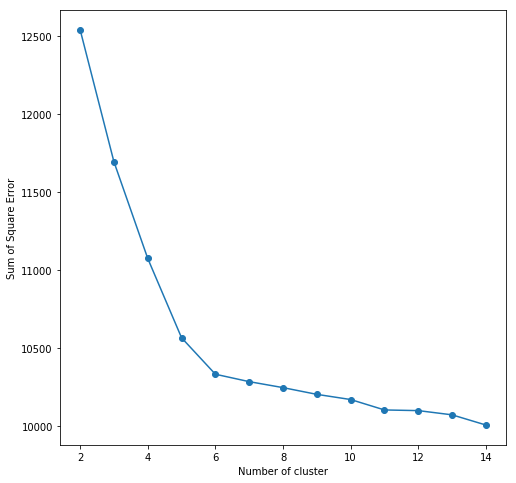

In [5]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [6]:
clusters = kmeans(matrix = matrix, cluster_num = 6)

In [7]:
def silhouette_graph(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

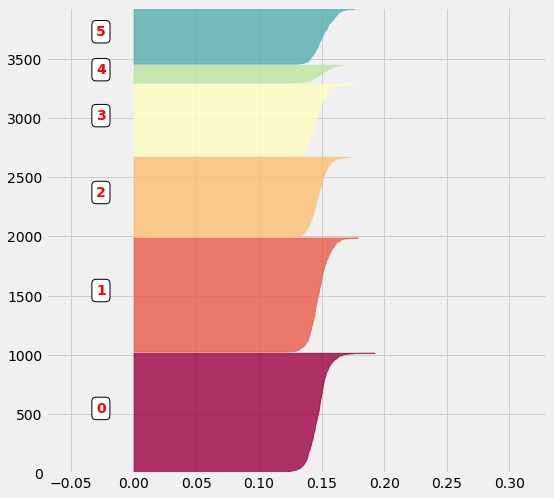

In [8]:
# Plot Silhouette graph
sample_silhouette_values = silhouette_samples(matrix, clusters)
silhouette_graph(6, [-0.07, 0.33], len(matrix), sample_silhouette_values, clusters)

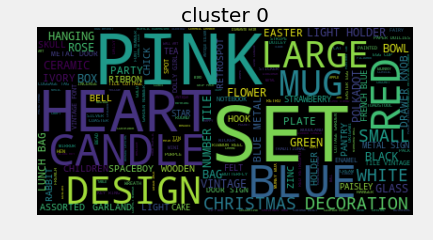

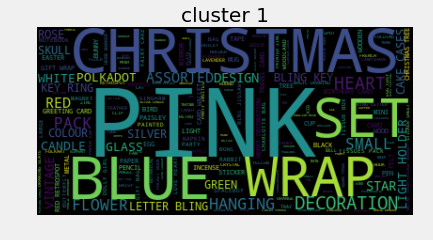

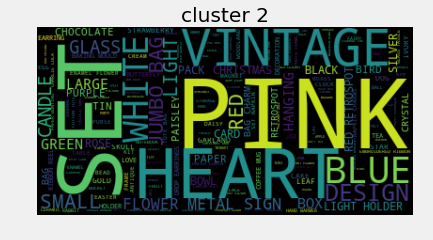

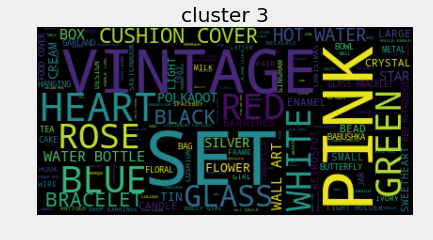

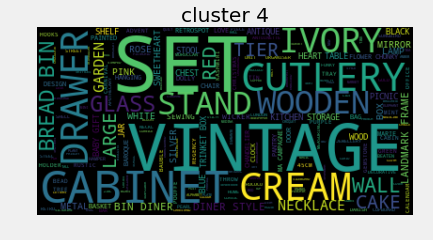

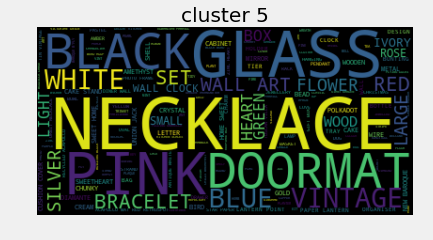

In [9]:
# Plot word cloud
d_list = df['Description'].unique().tolist()
prod_cluster = defaultdict(list)
for i in range(len(clusters)):
    cluster_num = clusters[i]
    prod_cluster[cluster_num].append(d_list[i])
for i in range(len(prod_cluster)):
    s = " "
    words = s.join(prod_cluster[i])
    wordcloud = WordCloud().generate(text = words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('cluster {}'.format(i))
    plt.show()

In [10]:
df = tf_idf_write_back(df,clusters)

In [11]:
tf_idf_rfm_ori = rfm(df,model_type='TF-IDF')
tf_idf_rfm = rfm_transform(tf_idf_rfm_ori)
tf_idf_rfm.head(5)
tf_idf_rfm_ori.head(5)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6
0,17850,34,372,5391.21,594.12,0.00,1048.50,1878.04,607.75,1262.80
1,13047,9,56,3232.59,494.78,277.18,536.48,956.90,140.80,826.45
2,12583,15,2,6705.38,1532.50,1448.88,1166.40,2082.10,230.25,245.25
3,13748,5,95,948.25,147.00,52.68,577.32,48.20,93.65,29.40
4,15100,3,333,876.00,0.00,0.00,0.00,0.00,876.00,0.00


In [12]:
matrix = rfm_matrix(tf_idf_rfm,model_type=1)
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.34976
Clusters = 3 ,Silhouette Score = 0.23696
Clusters = 4 ,Silhouette Score = 0.23206
Clusters = 5 ,Silhouette Score = 0.20141
Clusters = 6 ,Silhouette Score = 0.19398
Clusters = 7 ,Silhouette Score = 0.17704
Clusters = 8 ,Silhouette Score = 0.1791
Clusters = 9 ,Silhouette Score = 0.1754
Clusters = 10 ,Silhouette Score = 0.1669
Clusters = 11 ,Silhouette Score = 0.16312
Clusters = 12 ,Silhouette Score = 0.16014
Clusters = 13 ,Silhouette Score = 0.1527
Clusters = 14 ,Silhouette Score = 0.15155


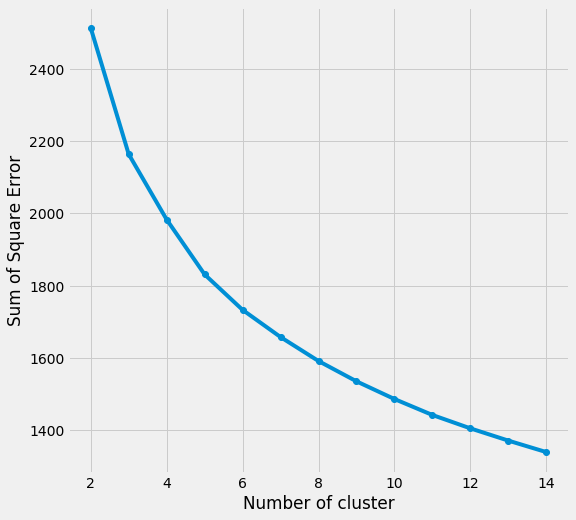

In [13]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [14]:
clusters = kmeans(matrix = matrix, cluster_num = 4)
tf_idf_rfm = rfm_write_back(tf_idf_rfm,clusters) 
tf_idf_rfm_ori = rfm_write_back(tf_idf_rfm_ori,clusters) 
tf_idf_rfm.head(5)
tf_idf_rfm_ori.head(5)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,Cluster
0,17850,34,372,5391.21,594.12,0.00,1048.50,1878.04,607.75,1262.80,3
1,13047,9,56,3232.59,494.78,277.18,536.48,956.90,140.80,826.45,3
2,12583,15,2,6705.38,1532.50,1448.88,1166.40,2082.10,230.25,245.25,3
3,13748,5,95,948.25,147.00,52.68,577.32,48.20,93.65,29.40,3
4,15100,3,333,876.00,0.00,0.00,0.00,0.00,876.00,0.00,3


In [15]:
n_attributes = len(tf_idf_rfm_ori.columns) - 5
customer_clustering = df_for_chart(tf_idf_rfm_ori, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_3 std,cate_4,cate_4 mean,cate_4 std,cate_5,cate_5 mean,cate_5 std,cate_6,cate_6 mean,cate_6 std
Cluster,,,,,,,,,,,,,,,,,,,,,
3,4506224.93,1008.390,1635,4,283.330,24.518443,675.753015,2948.556610,11.564033,318.716410,...,2797.914693,18.031108,496.955517,1817.825045,5.951601,164.032128,696.927292,14.370963,396.078239,1175.353283
2,1694542.90,735.935,822,3,298.485,23.075828,475.705353,1257.903245,10.597416,218.464428,...,2322.195480,18.899148,389.603613,1691.781410,6.298802,129.849027,689.698043,15.889194,327.553783,1235.533948
1,1216178.43,612.780,847,2,292.035,20.050966,287.904982,454.753223,10.157957,145.854640,...,732.344222,17.389701,249.692786,1169.071648,8.112740,116.488064,1333.333325,24.912756,357.713778,5233.088849
0,707014.39,379.170,1018,1,274.055,25.212877,175.106749,274.990672,12.548644,87.151984,...,240.352769,17.834010,123.859548,231.515336,10.700475,74.316208,1244.933380,12.384834,86.014303,155.817508


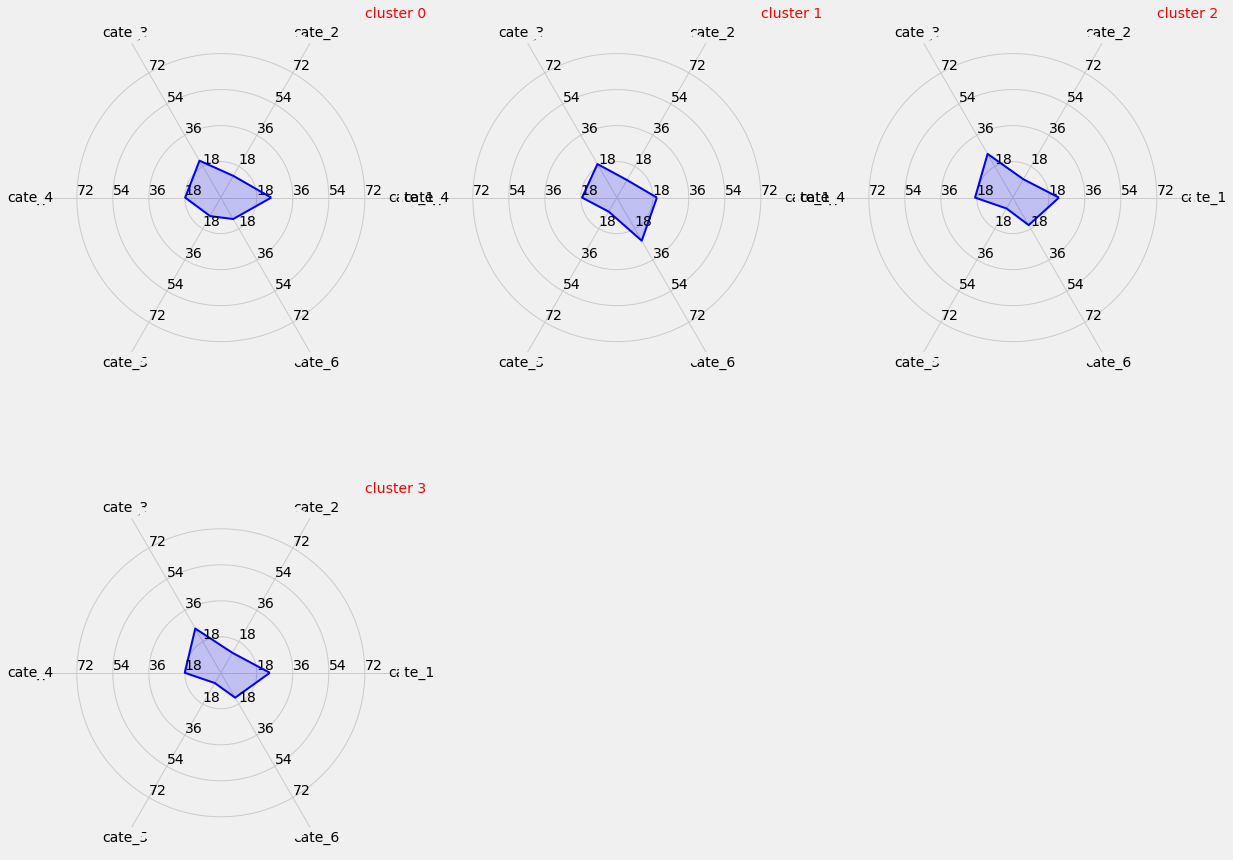

In [16]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

/Users/waynechen/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


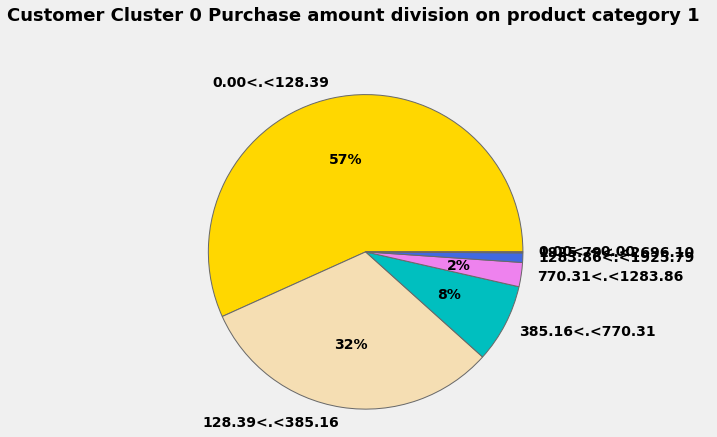

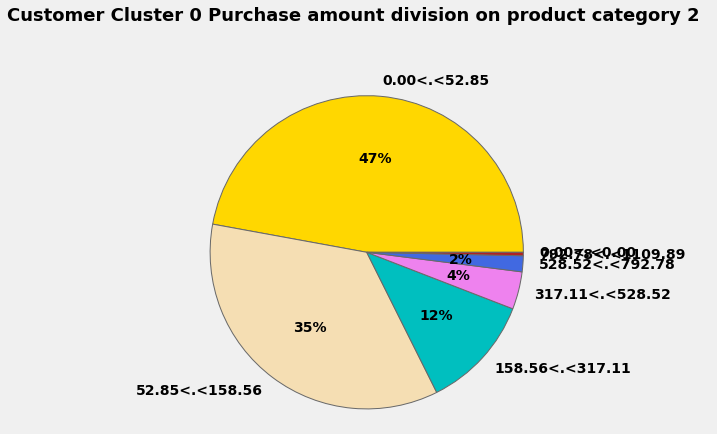

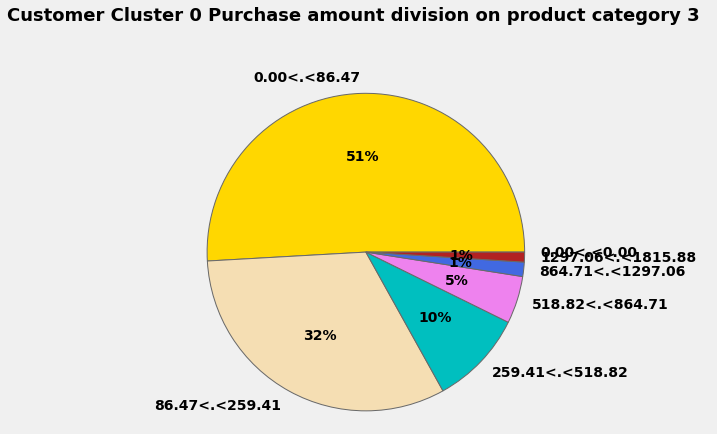

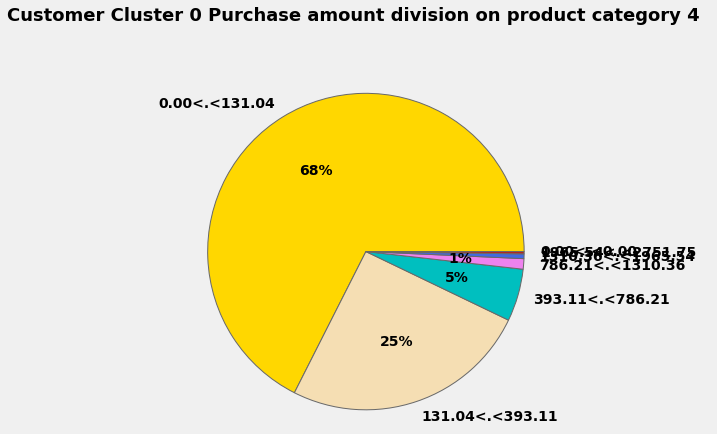

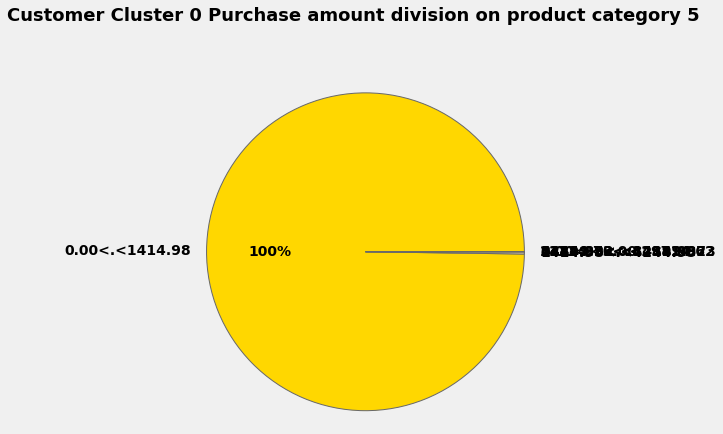

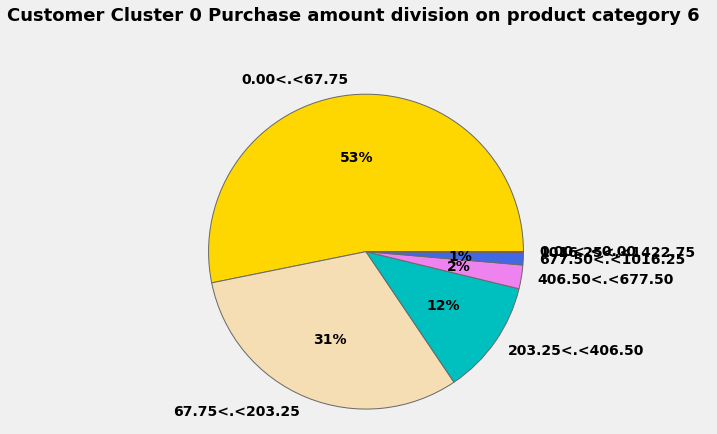

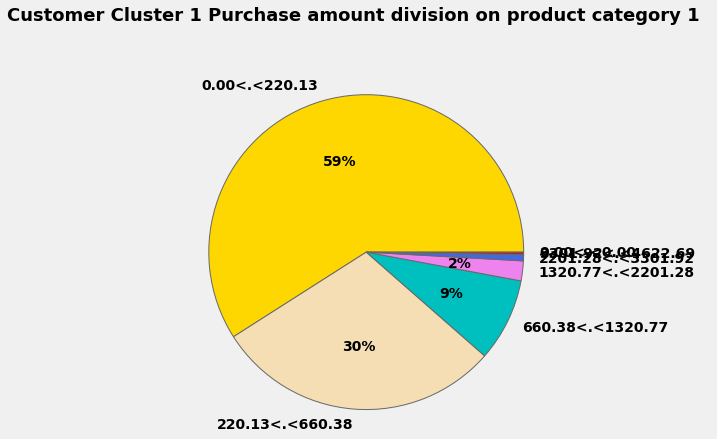

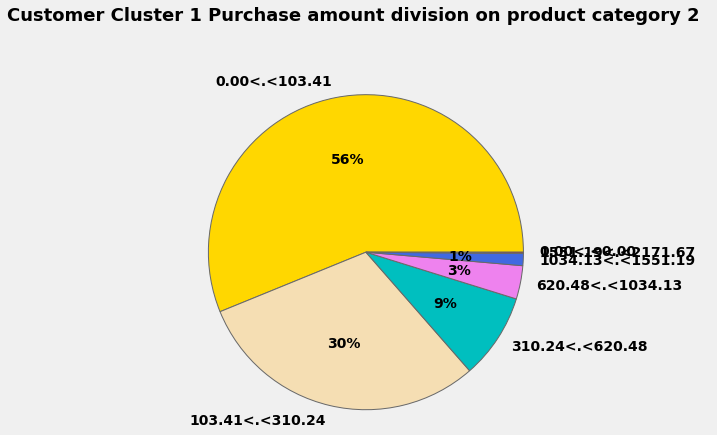

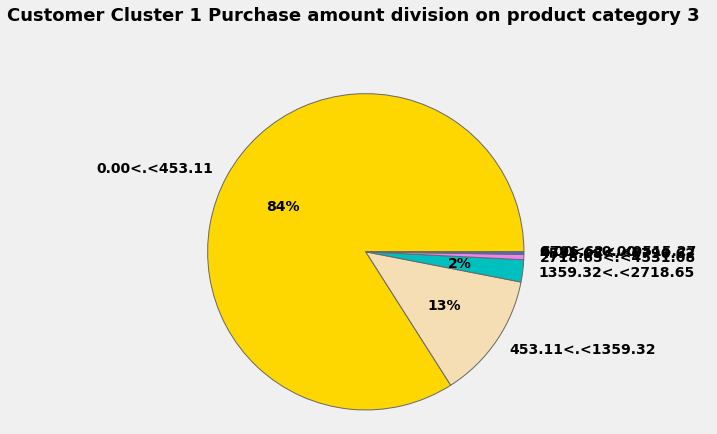

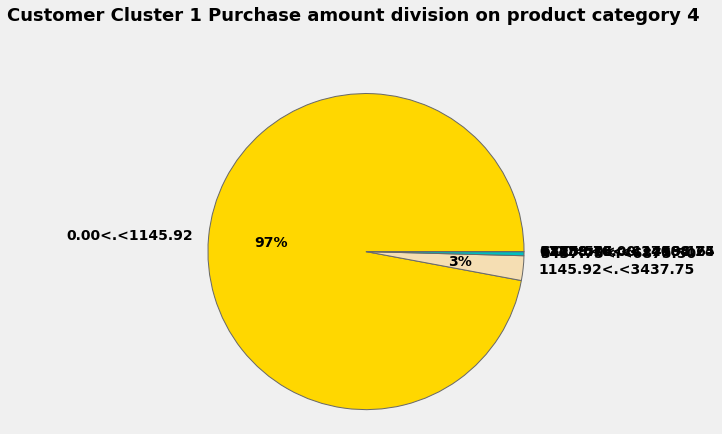

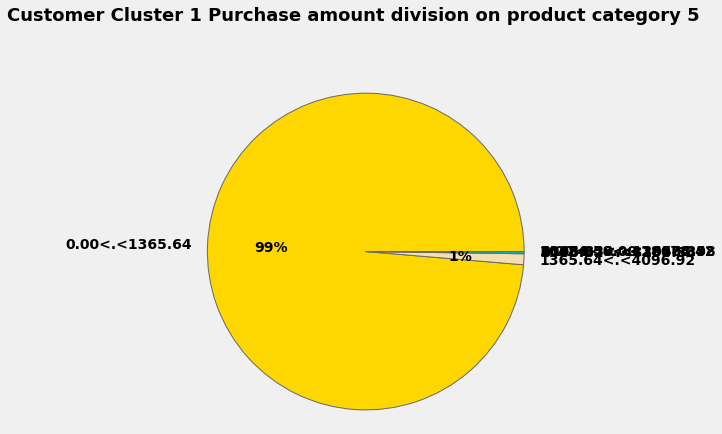

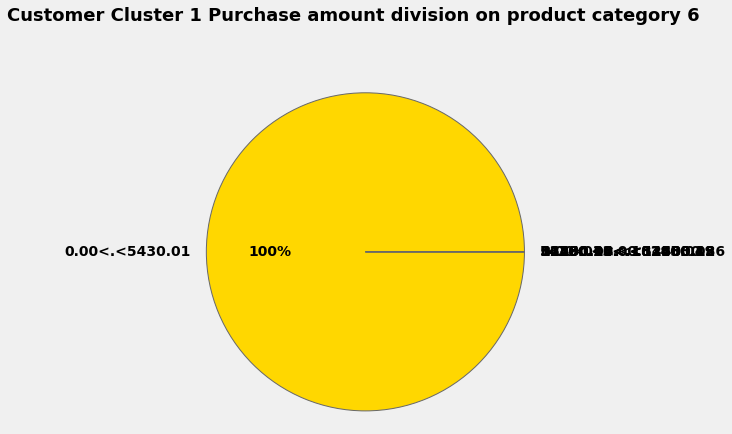

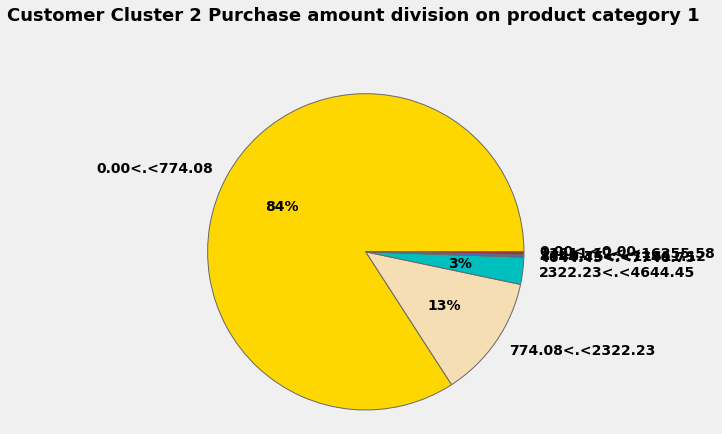

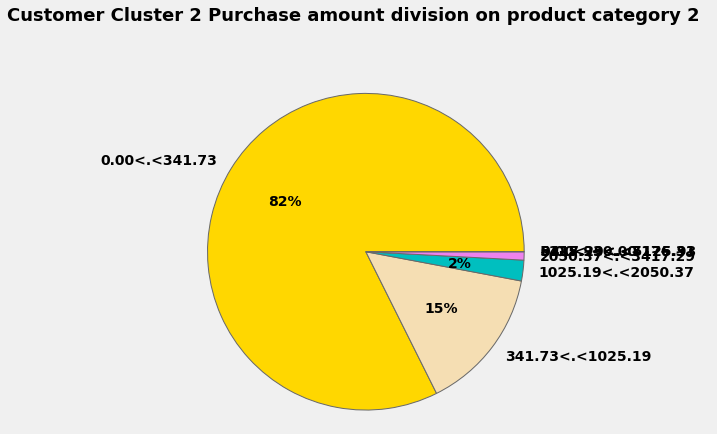

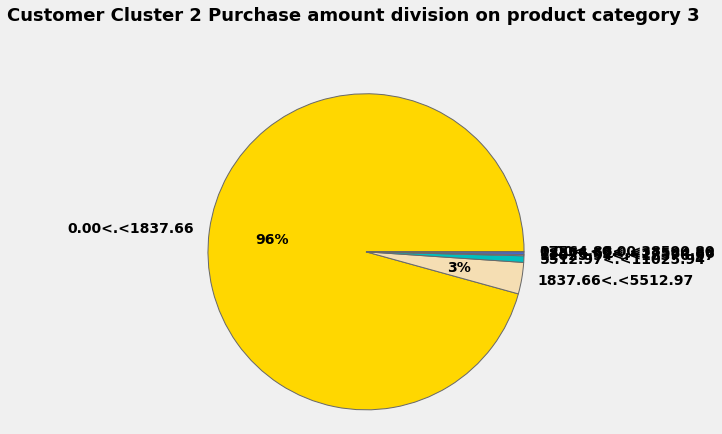

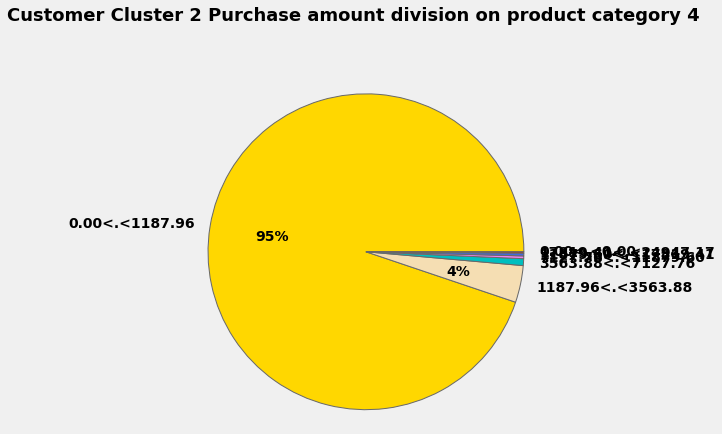

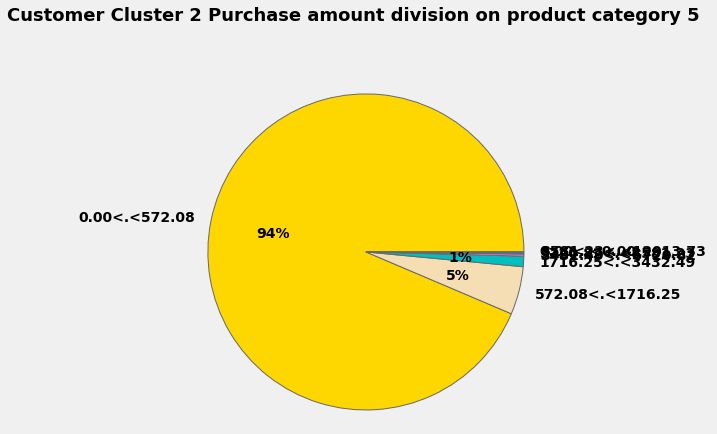

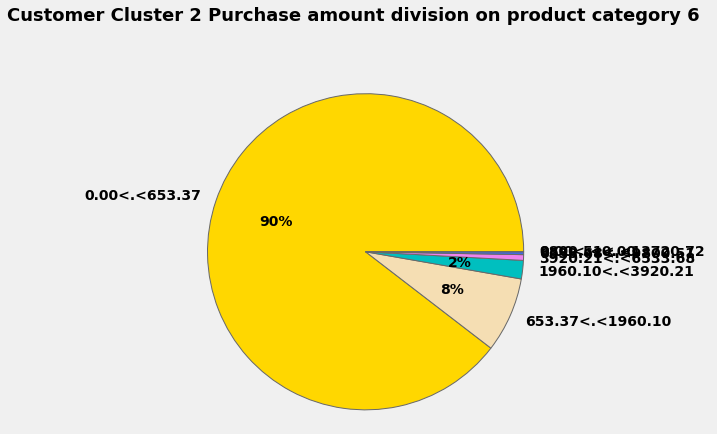

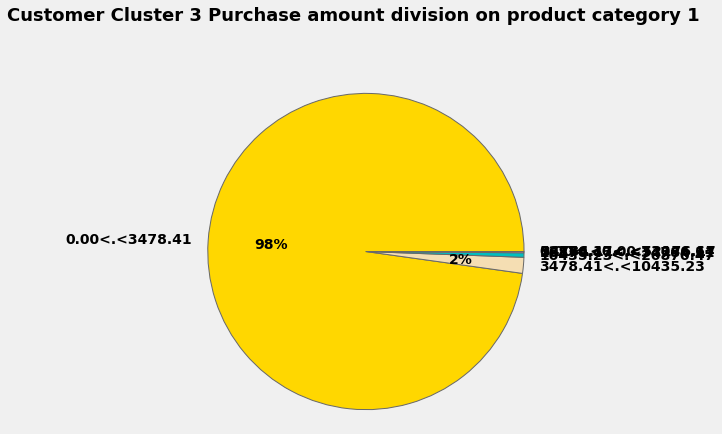

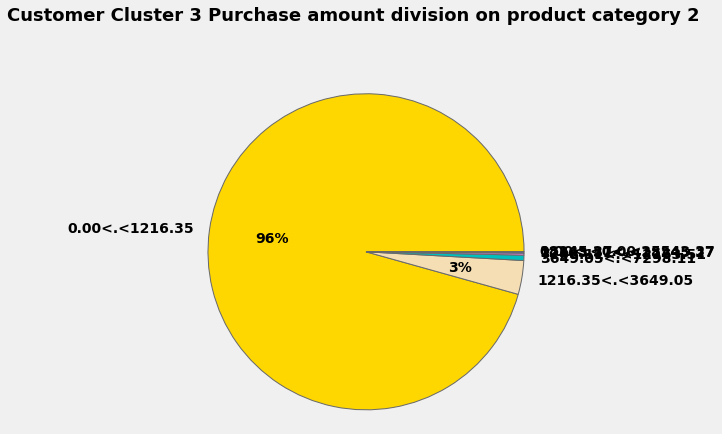

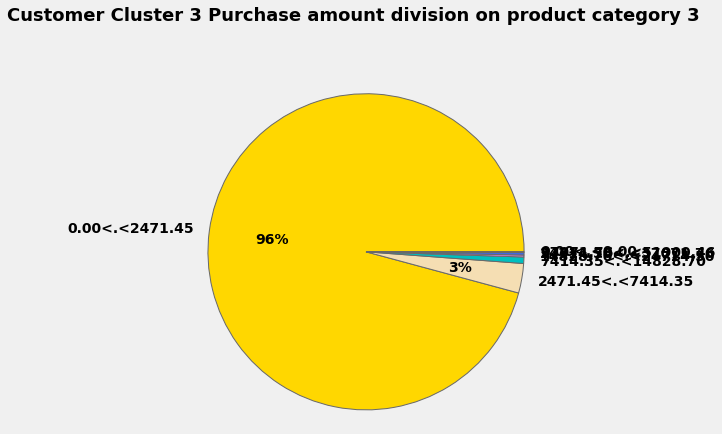

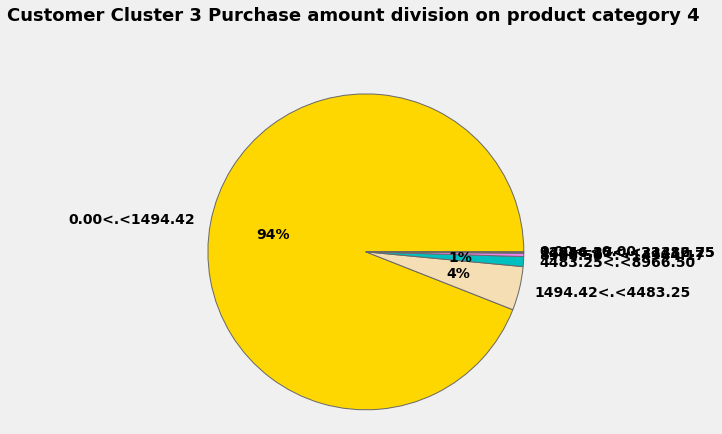

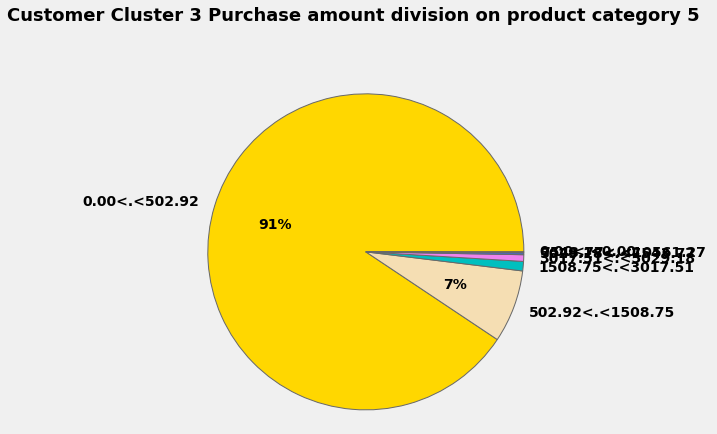

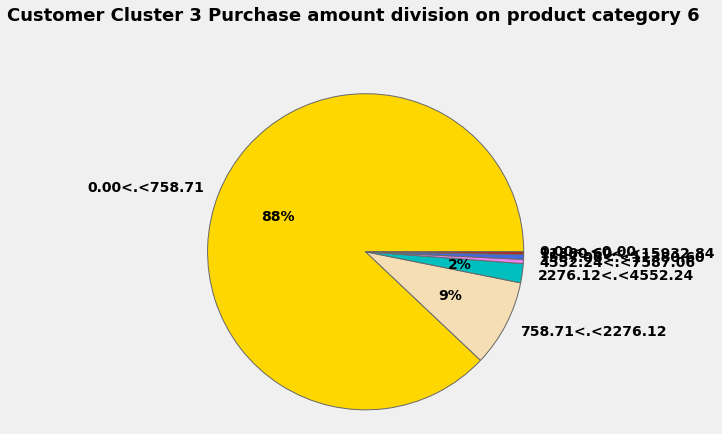

In [17]:
for i in range(n_clusters):
    for j in range(1, n_attributes+1):
        pie_chart(tf_idf_rfm_ori, i, j)